<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#生成波形模板" data-toc-modified-id="生成波形模板-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>生成波形模板</a></span><ul class="toc-item"><li><span><a href="#考察目标-GW-波形的质量分布" data-toc-modified-id="考察目标-GW-波形的质量分布-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>考察目标 GW 波形的质量分布</a></span><ul class="toc-item"><li><span><a href="#For-preprint" data-toc-modified-id="For-preprint-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>For preprint</a></span></li></ul></li><li><span><a href="#生成GW波形--From-Panyi" data-toc-modified-id="生成GW波形--From-Panyi-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>生成GW波形  From Panyi</a></span></li><li><span><a href="#生成GW波形-From-Panyi+Liu" data-toc-modified-id="生成GW波形-From-Panyi+Liu-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>生成GW波形 From Panyi+Liu</a></span></li></ul></li></ul></div>

# 生成波形模板



In [1]:
from data_utils import *
from plot import *

### importing the library
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import signal

# import matplotlib.pyplot as plt
# %matplotlib inline 

import os, sys, time

# for auto-re00loading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## 考察目标 GW 波形的质量分布

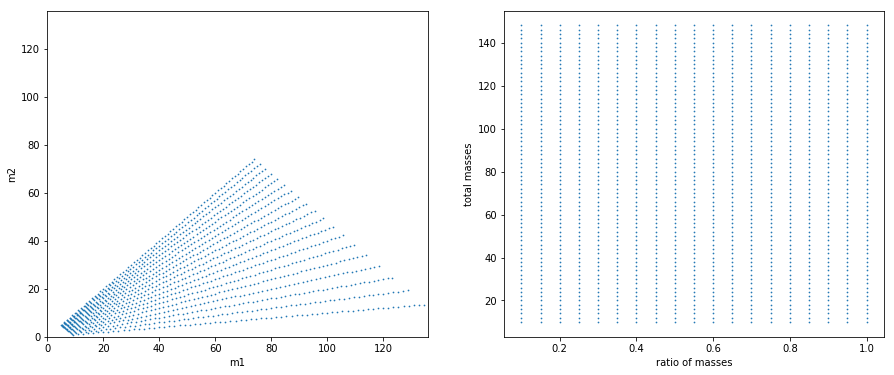

共有: 1330


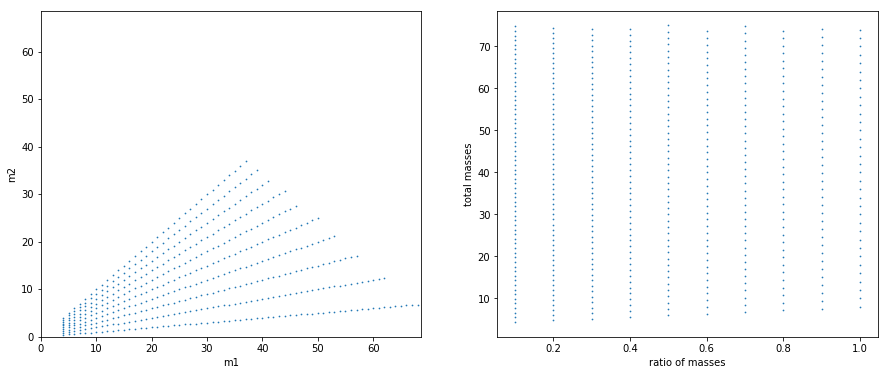

共有: 467


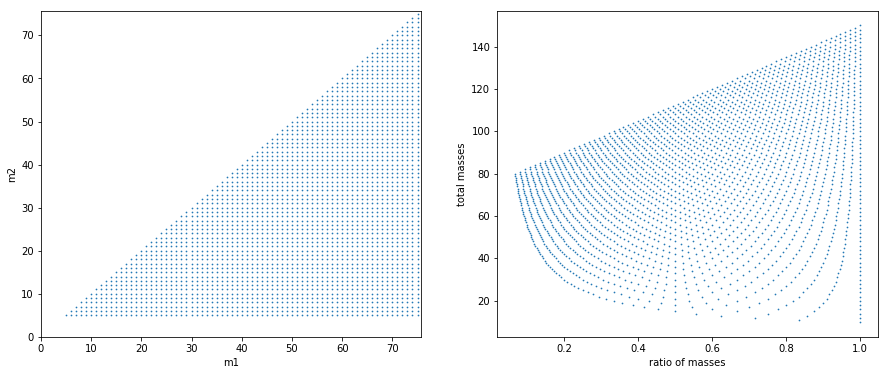

共有: 2556


In [3]:
masses = Distribution_of_masses(Mass_scope = (10, 150), Mass_step = 2, ratio_scope = (0.1, 1), ratio_step = 0.05)
Plot_masses_scratch(masses)
print('共有:', len(masses)) # masses 是一个 list
masses = Distribution_of_masses(mass1_scope = (4,75), mass_step = 1, ratio_scope = (0.1,1), ratio_step = 0.1)
Plot_masses_scratch(masses)
print('共有:', len(masses)) # masses 是一个 list
masses = Distribution_of_masses(mass1_scope = (5,75), mass2_scope = (5,75), mass_step = 1)
Plot_masses_scratch(masses)
print('共有:', len(masses)) # masses 是一个 list

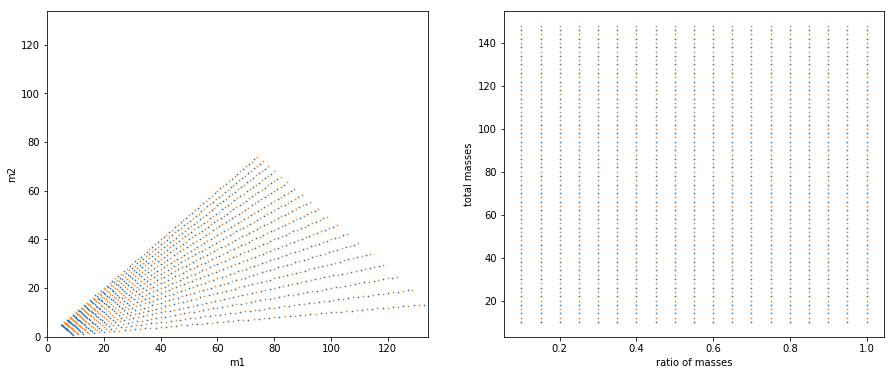

In [3]:
masses = Distribution_of_masses(Mass_scope = (10, 150), Mass_step = 2, ratio_scope = (0.1, 1), ratio_step = 0.05)
masses_train = [(m1,m2) for (m1, m2) in masses if m1 + m2 in range(10, 150, 4)]
masses_test = [(m1,m2) for (m1, m2) in masses if m1 + m2 in range(12, 150, 4)]
Plot_masses_scratch(masses_train, masses_test)

### For preprint

共有: 1974


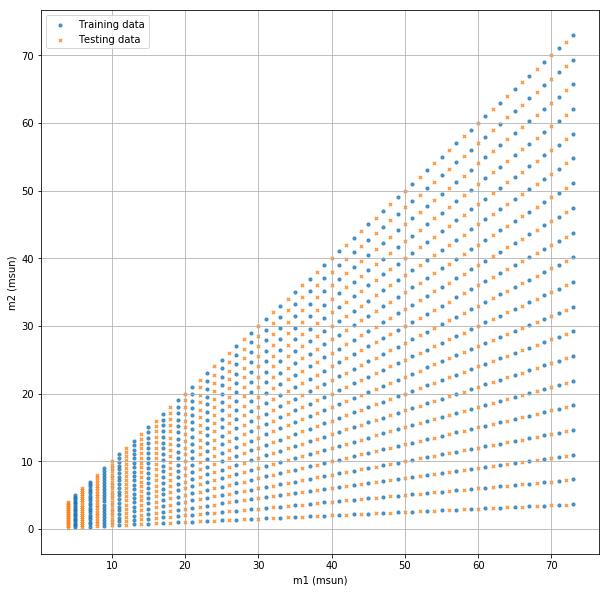

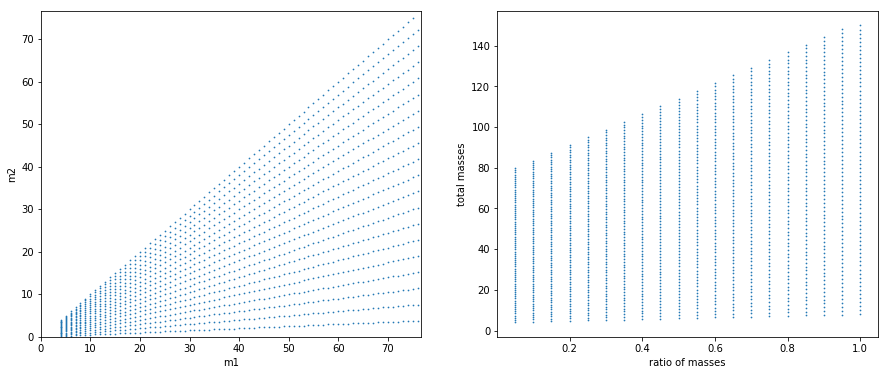

In [112]:
masses = Distribution_of_masses(mass1_scope = (4,150), mass_step = 1, ratio_scope = (0.05,1), ratio_step = 0.05)
print('共有:', len(masses)) # masses 是一个 list
masses_train = [(m1,m2) for (m1, m2) in masses if (m1 in range(5, 75, 2)) and (m1  <= 76)]
masses_test = [(m1,m2) for (m1, m2) in masses if (m1 in range(4, 74, 2)) and (m1  <= 76)]

plt.figure(figsize=(10,10))
plt.scatter(np.array(masses_train)[:,0], np.array(masses_train)[:,1], s=10, alpha=0.75, label = 'Training data')
plt.scatter(np.array(masses_test)[:,0], np.array(masses_test)[:,1], s=10, alpha=0.75, label= 'Testing data', marker = 'x')
plt.grid()
plt.xlabel('m1 (msun)')
plt.ylabel('m2 (msun)')
# plt.xlim(0, np.array(masses_train).max()*(1+0.01))
# plt.ylim(0, np.array(masses_train).max()*(1+0.01))
plt.legend()
plt.savefig('./images/paper1.png', dpi = 300, bbox_inches = 'tight')

Plot_masses_scratch([(m1, m2) for m1, m2 in masses if m1  <= 76])

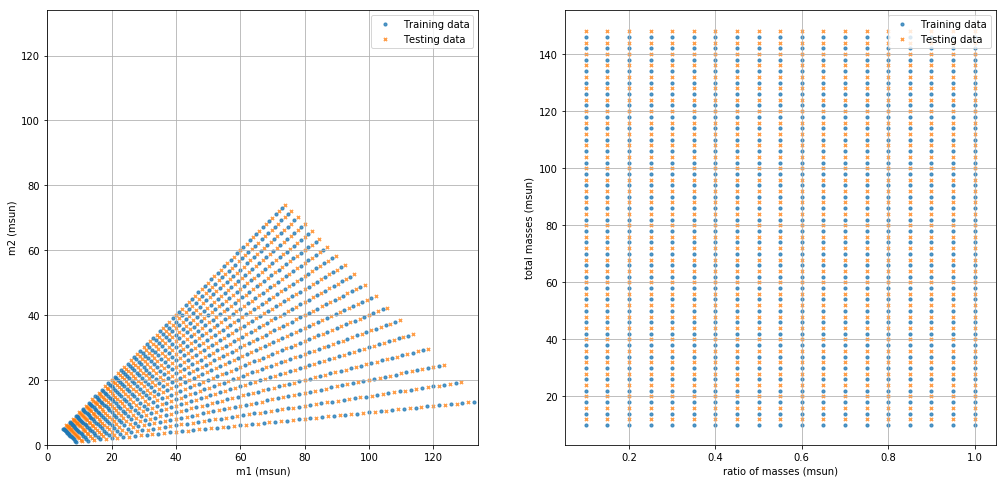

In [126]:
masses = Distribution_of_masses(Mass_scope = (10, 150), Mass_step = 2, ratio_scope = (0.1, 1), ratio_step = 0.05)
masses_train = np.array([(m1,m2) for (m1, m2) in masses if m1 + m2 in range(10, 150, 4)])
masses_test = np.array([(m1,m2) for (m1, m2) in masses if m1 + m2 in range(12, 150, 4)])

plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.scatter(masses_train[:,0], masses_train[:,1], s=10, alpha=0.75, label = 'Training data')
plt.scatter(masses_test[:,0], masses_test[:,1], s=10, alpha=0.75, label= 'Testing data', marker = 'x')
plt.grid()
plt.xlabel('m1 (msun)')
plt.ylabel('m2 (msun)')
plt.xlim(0, np.array(masses_train).max()*(1+0.01))
plt.ylim(0, np.array(masses_train).max()*(1+0.01))
plt.legend()

plt.subplot(1,2,2)
plt.scatter(masses_train[:,1]/masses_train[:,0], masses_train[:,0] + masses_train[:,1], s=10, alpha=0.75, label = 'Training data')
plt.scatter(masses_test[:,1]/masses_test[:,0], masses_test[:,0] + masses_test[:,1], s=10, alpha=0.75, label= 'Testing data', marker = 'x')
plt.xlabel('ratio of masses (msun)'), plt.ylabel('total masses (msun)')
plt.grid()
plt.legend()
# plt.savefig('./images/m1m2.png')
plt.show()

## 生成GW波形  From Panyi

In [2]:
!./Panyi_code/Panyi --help
print()
!./detector_strain/MYdetector_strain --help

Generate a simulation using the lalsimulation library

The following options can be given (will assume a default value if omitted):
--amp-phase                If given, will output:
                           |h+ - i hx|, Arg(h+ - i hx) (TD) or
                           |h+(f)|, Arg(h+(f)), |hx(f)|, Arg(hx(f)) (FD)
                           If not given, will output h+ and hx (TD and FD)
                           NOTE: Other approximants may be available if the
                           developer forgot to edit this help message
--amp-order ORD            Twice PN order of amplitude (default 0 <==> Newt.)
--phiRef phiRef            Phase at the reference frequency (default 0)
                           (default: 0)
--sample-rate SRATE        Sampling rate of TD approximants in Hz (default 4096)
--m1 M1                    Mass of the 1st object in solar masses (default 10)
--m2 M2                    Mass of the 2nd object in solar masses (default 1.4)
--inclination IOTA         Angl

In [3]:
import warnings
warnings.filterwarnings("ignore")

def GenGW(masses,  T = 1, fs = 8192, peak_time = 0.8, time_shuffle = [0], f_min = 20, temp_file = 'test.dat', H1_file = 'H1.dat', L1_file = 'L1.dat'):
    """
    生成引力波波形. 
    注意: 要求该函数执行时，Panyi 的程序文件夹相对路径位于: './Panyi_code/Panyi'
         可以通过终端命令 './Panyi_code/Panyi --help' 来检查.

    Input:
    - masses: A list. 其中的元素是双黑洞质量对组成的元组. Eg: [(5,5),(10,10),(15,15)]. 需配合 Distribution_of_masses 函数.
    - PREFIX: detector prefix (e.g., 'H1', 'L1', 'V1')
    - T: 信号波形的时长[s]. 默认为1s.
    - fs: 信号的采样率[Hz]. 默认为8192Hz. (注: N = T * fs, N 必须能被2整除)
    - peak_time: 自起始位置起, 波形信号最大峰值所对应的时间[s]. 默认为0.8s. 主要搭配 time_shuffle 参数使用.
    - time_shuffle: A list. 默认为[0], 其中的列表元素表示偏离 peak_time 的时间差[s]. 
                    (生成波形的次序依据偏离时间差的绝对值有小到大顺序)
    - f_min: Int. 默认值为20[Hz]. 表示从 Panyi 程序中生成GW波形的最小频率.(Lower frequency to start waveform in Hz)
             (若因 f_min 过大使得处理后的信号不够 N, 会 f_min-=5 重新循环生成波形, 直到达到需求)
    - temp_file: Str. 默认值为'test.dat'. 该函数运行过程中会在本地目录中缓存的文件名(最终会自动清理删除)
    
    Output:
    - data: DataFrame. GW 波形信号构成的表格, index 是 GW 波形对应的双黑洞质量.
    """
    N = int(T * fs)
    time_shuffle.sort(key = abs)
    
    assert N % 2 ==0 and fs % 2 == 0
    print('({t:s})'.format(t=time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time()))))
    
    # 初始化
    index = 0
    index_timeshuffle = 0
    fmin = f_min
    data_H1 = pd.DataFrame(np.array([]))
    data_L1 = pd.DataFrame(np.array([]))
    peaktime = peak_time + time_shuffle[index_timeshuffle]
    peakpoint = int(peaktime * N)
    
    while True:
        try:
            m1, m2 = masses[index]
        except IndexError: # 全部 masses 穷尽后退出循环
            break
            
        # 每个信号生成前的时间戳和进度提示
        stamp = '({t:s}) Working on masses=({m1:.2f}|{m2:.2f}) with fmin={fmin:d} (complete percent: {percent:.2f}/100)'.format(t=time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())), m1=m1, m2=m2,fmin=fmin, percent=1.0 * index / len(masses) * 100)
        print(stamp, end='')

        try:
            os.system('./Panyi_code/Panyi --m1 {m1:.2f} --m2 {m2:.2f} --sample-rate {fs:d} --f-min {fmin:d} --outname {file:s}'.format(m1=m1, m2=m2, fs=fs, fmin=fmin, file=temp_file))
            os.system('./detector_strain/MYdetector_strain -D {PREFIX:s} -a 1:23:45 -d 45.0 -p 30.0 -t 1000000000 < {file:s} > {file0:s}'.format(PREFIX='H1', file=temp_file, file0=H1_file))
            os.system('./detector_strain/MYdetector_strain -D {PREFIX:s} -a 1:23:45 -d 45.0 -p 30.0 -t 1000000000 < {file:s} > {file0:s}'.format(PREFIX='L1', file=temp_file, file0=L1_file))
            assert np.loadtxt(H1_file).shape[0] != 0
            assert np.loadtxt(L1_file).shape[0] != 0
        except AssertionError: # 避免 XLALSimDetectorStrainREAL8TimeSeries(): error: input series too long
            fmin -= 5
            continue

        try:
            temp = pd.DataFrame(np.loadtxt(H1_file))
            temp0 = pd.DataFrame(np.loadtxt(L1_file))
        except FileNotFoundError as e:
            print(e)

        while True: 
            # For H1
            # 固定最大峰值位置为第peakpoint个采样点
            posmax = temp[1].argmax()
            part1 = temp[1][posmax-peakpoint+1:]
            part1 = pd.Series(part1.values, index=range(1, len(part1)+1))
            lenpart1 = len(part1)
            if lenpart1 < N:
                lenpart2 = N - part1.shape[0]
                part2 = pd.Series(list([part1.values[-1]]) *lenpart2, index=range(lenpart1+1, lenpart1+1+lenpart2))
                temp_H1 = part1.append(part2, ignore_index = False, verify_integrity = True)
            else:
                temp_H1 = part1[:N]
            
            try:
                # 查验
                assert temp_H1.argmax() == peakpoint   # 如果test的max不够peakpoint, 终止载入，做好标记~
            except AssertionError: # Panyi给出并处理后的temp_有可能不够N个
                print()
                print('The number of GW_sample ({m1:.2f}|{m2:.2f}) with fmin={fmin:d} peaktime={peaktime:.2f}s cannot be {N:d}!'.format(m1=m1,m2=m2,fmin=fmin, peaktime=peaktime,N=N))
                fmin -= 5
                break
            
            # For L1
            part1 = temp0[1][posmax-peakpoint+1:]
            part1 = pd.Series(part1.values, index=range(1, len(part1)+1))
            lenpart1 = len(part1)
            if lenpart1 < N:
                lenpart2 = N - part1.shape[0]
                part2 = pd.Series(list([part1.values[-1]]) *lenpart2, index=range(lenpart1+1, lenpart1+1+lenpart2))
                temp_L1 = part1.append(part2, ignore_index = False, verify_integrity = True)
            else:
                temp_L1 = part1[:N]
            
           

            # 删除本地备份文件
            os.system('rm {file:s}'.format(file=temp_file))
            os.system('rm {file:s}'.format(file=H1_file))
            os.system('rm {file:s}'.format(file=L1_file))
            
            # 保存
            data_H1 = pd.concat([data_H1, pd.DataFrame([temp_H1.values], index=['{m1:.2f}|{m2:.2f}'.format(m1=m1,m2=m2)])])
            data_L1 = pd.concat([data_L1, pd.DataFrame([temp_L1.values], index=['{m1:.2f}|{m2:.2f}'.format(m1=m1,m2=m2)])])
            sys.stdout.write("\r")
            try:
                # 更新 peakpoint
                index_timeshuffle += 1
                assert len(time_shuffle) > index_timeshuffle
            except AssertionError: # timeshuffle没有值可用的时候结束循环跳出
                index_timeshuffle = 0
                index += 1    
                fmin = f_min
                break
            finally:
                peaktime = peak_time + time_shuffle[index_timeshuffle]
                peakpoint = int(peaktime * N)
    print('Finished!')
    return data_H1, data_L1

In [4]:
masses = Distribution_of_masses(mass1_scope = (4,90), mass_step = 1, ratio_scope = (1,10), ratio_step = 0.1)
# len([(m1, m2) for (m1, m2) in masses])
len(masses)
masses[:2]

[(4, 4.0), (4, 4.4)]

In [5]:
%%time
# masses = Distribution_of_masses(Mass_scope = (10, 150), Mass_step = 2, ratio_scope = (0.1, 1), ratio_step = 0.05)
# data = GenGW(masses ,peak_time = 0.05, time_shuffle = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

masses = Distribution_of_masses(mass1_scope = (4,90), mass_step = 1, ratio_scope = (1,10), ratio_step = 0.1)
data_H1, data_L1 = GenGW(masses ,peak_time = 0.9, time_shuffle = [0])
print('Successful!')
# CPU times: user 2h 7min 22s, sys: 55min 12s, total: 3h 2min 35s
# Wall time: 4h 36min 13s

(2018-10-12 15:31:02)
(2018-10-12 16:46:03) Working on masses=(14.00|74.20) with fmin=20 (complete percent: 65.49/100)2018-10-12 16:22:20) Working on masses=(8.00|80.00) with fmin=15 (complete percent: 36.35/100)(2018-10-12 16:27:06) Working on masses=(9.00|73.80) with fmin=15 (complete percent: 42.19/100)(2018-10-12 16:27:11) Working on masses=(9.00|74.70) with fmin=15 (complete percent: 42.27/100)(2018-10-12 16:27:16) Working on masses=(9.00|75.60) with fmin=15 (complete percent: 42.35/100)(2018-10-12 16:27:21) Working on masses=(9.00|76.50) with fmin=15 (complete percent: 42.43/100)(2018-10-12 16:27:26) Working on masses=(9.00|77.40) with fmin=15 (complete percent: 42.51/100)(2018-10-12 16:27:31) Working on masses=(9.00|78.30) with fmin=15 (complete percent: 42.59/100)(2018-10-12 16:27:36) Working on masses=(9.00|79.20) with fmin=15 (complete percent: 42.67/100)(2018-10-12 16:27:41) Working on masses=(9.00|80.10) with fmin=15 (complete percent: 42.75/100)(2018-10-12 16:27:46) Workin

In [6]:
%%time
np.save('./GW_H1', data_H1.values)
np.save('./GW_H1_index', data_H1.index.values)
!ls -lh ./GW_H1.npy
!ls -lh ./GW_H1_index.npy

np.save('./GW_L1', data_L1.values)
np.save('./GW_L1_index', data_L1.index.values)
!ls -lh ./GW_L1.npy
!ls -lh ./GW_L1_index.npy

-rw-r--r--  1 Herb  staff    78M Oct 12 17:15 ./GW_H1.npy
-rw-r--r--  1 Herb  staff    25K Oct 12 17:15 ./GW_H1_index.npy
-rw-r--r--  1 Herb  staff    78M Oct 12 17:15 ./GW_L1.npy
-rw-r--r--  1 Herb  staff    25K Oct 12 17:15 ./GW_L1_index.npy
CPU times: user 29.4 ms, sys: 458 ms, total: 487 ms
Wall time: 1.83 s


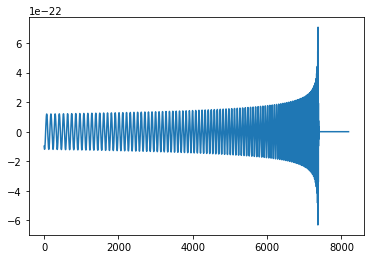

In [9]:
plt.plot(data_H1.values[0])

In [88]:
%%time

np.save('GW', data.values)
np.save('GW_index', data.index.values)
!ls -lh GW.npy
!ls -lh GW_index.npy

-rw-r--r--  1 Herb  staff   831M Aug 12 17:05 GW.npy
-rw-r--r--  1 Herb  staff   270K Aug 12 17:05 GW_index.npy
CPU times: user 194 ms, sys: 8 s, total: 8.19 s
Wall time: 9.59 s


In [89]:
%%time

tt = np.load('GW.npy')
tt_ = np.load('GW_index.npy')

CPU times: user 7.18 ms, sys: 983 ms, total: 990 ms
Wall time: 1.49 s


In [90]:
data = pd.DataFrame(tt, index=tt_)
print(data.shape)
data.head()

(13300, 8192)


,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
5.00|5.00,-5.919231e-22,-6.160910e-22,-6.296472e-22,-6.323189e-22,-6.240207e-22,-6.048574e-22,-5.751237e-22,-5.353001e-22,-4.860459e-22,-4.281887e-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.00|5.00,-3.283272e-22,-2.938338e-22,-2.569290e-22,-2.179099e-22,-1.770915e-22,-1.348042e-22,-9.139055e-23,-4.720332e-23,-2.601992e-24,4.204986e-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.00|5.00,4.111777e-22,4.217280e-22,4.298880e-22,4.356093e-22,4.388578e-22,4.396132e-22,4.378692e-22,4.336340e-22,4.269298e-22,4.177929e-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.00|5.00,-9.042932e-23,-6.373467e-23,-3.674736e-23,-9.587949e-24,1.762212e-23,4.476108e-23,7.170742e-23,9.834036e-23,1.245404e-22,1.501901e-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.00|5.00,-2.991239e-22,-3.132659e-22,-3.262402e-22,-3.379979e-22,-3.484945e-22,-3.576902e-22,-3.655501e-22,-3.720442e-22,-3.771477e-22,-3.808408e-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# 检查是否有 NULL
True in data.isnull().values

False

['27.78|22.22']


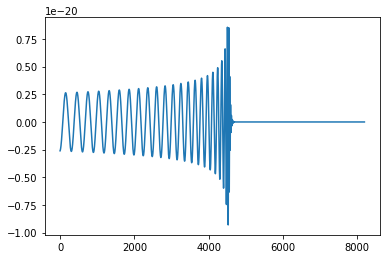

In [92]:
# 波形随机抽样预览
t = data.sample(1)
print(t.index.values)
plt.plot(t.values[0])
plt.show()

In [93]:
# 检查波形峰值点
pd.Series([data.iloc[i,].argmax() for i in range(data.shape[0])]).value_counts()

2047    1330
7781    1330
6143    1330
3685    1330
1227    1330
2866    1330
4504    1330
5323    1330
6962    1330
408     1330
dtype: int64

## 生成GW波形 From Panyi+Liu

In [38]:
!ls data/GW.npy
!less test0.dat

^C
test0.dat: No such file or directory


In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

In [40]:
os.system('./Panyi_code/Panyi --m1 {m1:.2f} --m2 {m2:.2f} --sample-rate {fs:d} --f-min {fmin:d} --outname {file:s}'.format(m1=5, m2=5, fs=8192, fmin=20, file='ss'))

256

In [44]:
os.system('./detector_strain/MYdetector_strain -D {PREFIX:s} -a 1:23:45 -d 45.0 -p 30.0 -t 1000000000 < {file:s} > {file0:s}'.format(PREFIX='H1', 
                                                                                                                                     file='ss', 
                                                                                                                                     file0='HH'))
os.system('./detector_strain/MYdetector_strain -D {PREFIX:s} -a 1:23:45 -d 45.0 -p 30.0 -t 1000000000 < {file:s} > {file0:s}'.format(PREFIX='L1', 
                                                                                                                                     file='ss', 
                                                                                                                                     file0='LL'))

0

In [48]:
HH = pd.DataFrame(np.loadtxt('HH'))
print(HH.shape)
HH.head()

(158089, 2)


,0,1
0,1.000000e+09,-3.456199e-25
1,1.000000e+09,3.283869e-25
2,1.000000e+09,-7.335151e-25
3,1.000000e+09,8.016954e-25
4,1.000000e+09,-1.350555e-24


In [51]:
LL = pd.DataFrame(np.loadtxt('LL'))
print(LL.shape)
LL.head()

(158089, 2)


,0,1
0,1.000000e+09,1.392640e-25
1,1.000000e+09,-1.338445e-25
2,1.000000e+09,3.003850e-25
3,1.000000e+09,-3.267963e-25
4,1.000000e+09,5.547118e-25


In [55]:
%%time
masses = Distribution_of_masses(Mass_scope = (10, 150), Mass_step = 2, ratio_scope = (0.1, 1), ratio_step = 0.05)
data_H1, data_L1 = GenGW(masses, peak_time = 0.8, time_shuffle = [0])

# CPU times: user 23min 48s, sys: 1min 34s, total: 25min 22s
# Wall time: 2h 28min 50s

(2018-09-26 00:53:27)
Finished!
CPU times: user 36min 32s, sys: 1min 35s, total: 38min 7s
Wall time: 2h 3min 51s


In [56]:
%%time

np.save('./data/GW_H1', data_H1.values)
np.save('./data/GW_H1_index', data_H1.index.values)
!ls -lh ./data/GW_H1.npy
!ls -lh ./data/GW_H1_index.npy

-rw-r--r--  1 Herb  staff    83M Sep 26 02:57 ./data/GW_H1.npy
-rw-r--r--  1 Herb  staff    27K Sep 26 02:57 ./data/GW_H1_index.npy
CPU times: user 14.2 ms, sys: 238 ms, total: 252 ms
Wall time: 684 ms


In [57]:
%%time

np.save('./data/GW_L1', data_L1.values)
np.save('./data/GW_L1_index', data_L1.index.values)
!ls -lh ./data/GW_L1.npy
!ls -lh ./data/GW_L1_index.npy

-rw-r--r--  1 Herb  staff    83M Sep 26 02:57 ./data/GW_L1.npy
-rw-r--r--  1 Herb  staff    27K Sep 26 02:57 ./data/GW_L1_index.npy
CPU times: user 12.6 ms, sys: 223 ms, total: 236 ms
Wall time: 628 ms


In [58]:
%%time

tt = np.load('./data/GW_L1.npy')
tt_ = np.load('./data/GW_L1_index.npy')

CPU times: user 3.21 ms, sys: 117 ms, total: 120 ms
Wall time: 178 ms


In [59]:
data = pd.DataFrame(tt, index=tt_)
print(data.shape)
data.head()

(1330, 8192)


,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
5.00|5.00,-1.484704e-22,-1.469948e-22,-1.451561e-22,-1.429585e-22,-1.404075e-22,-1.375093e-22,-1.342710e-22,-1.307005e-22,-1.268066e-22,-1.225987e-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.13|4.87,-1.499905e-22,-1.491955e-22,-1.480317e-22,-1.465019e-22,-1.446100e-22,-1.423603e-22,-1.397584e-22,-1.368107e-22,-1.335244e-22,-1.299075e-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.26|4.74,-1.466213e-22,-1.481578e-22,-1.493279e-22,-1.501287e-22,-1.505580e-22,-1.506148e-22,-1.502988e-22,-1.496107e-22,-1.485521e-22,-1.471256e-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.41|4.59,-1.076203e-22,-1.126906e-22,-1.174820e-22,-1.219825e-22,-1.261808e-22,-1.300665e-22,-1.336299e-22,-1.368620e-22,-1.397547e-22,-1.423008e-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.56|4.44,4.710359e-24,-2.731377e-24,-1.016725e-23,-1.757875e-23,-2.494738e-23,-3.225479e-23,-3.948275e-23,-4.661323e-23,-5.362842e-23,-6.051083e-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# 每个 mass 对的最大峰值的采样点位置
data[data.index == tt_[0]].values.argmax(axis=1)

array([6556])

5.00|5.00


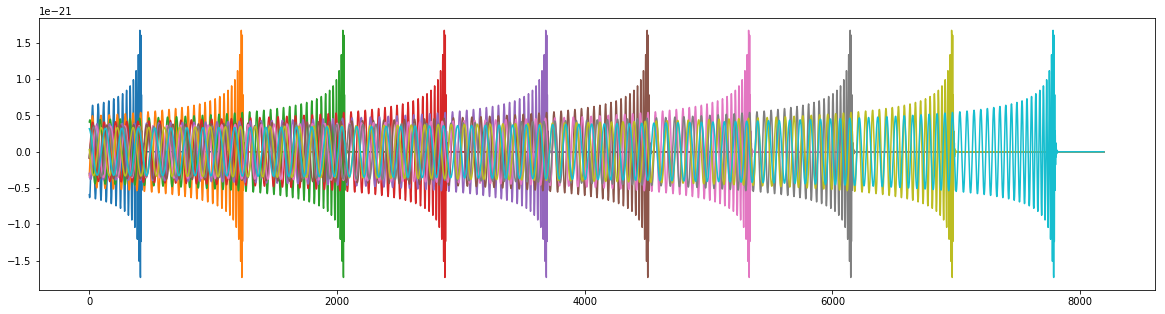

134.55|13.45


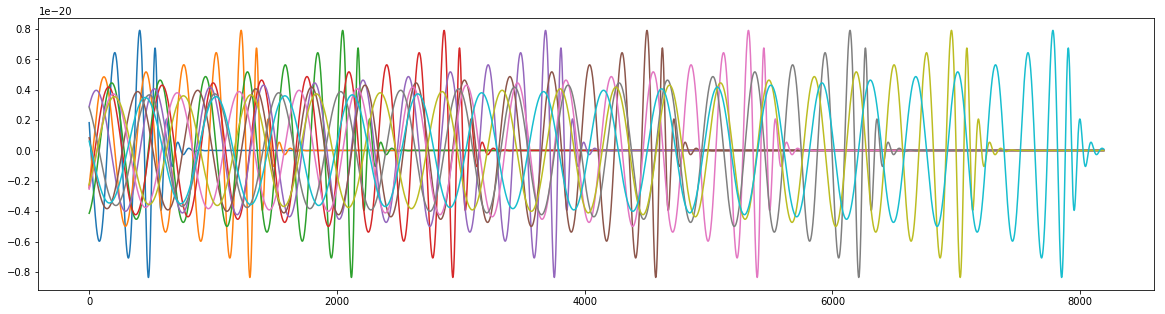

In [15]:
m = tt_[0]
data_plot = data[data.index == m]
print(m)

plt.figure(figsize=(20,5))
for i in range(data_plot.shape[0]):
    plt.plot(data_plot.values[i,:])
plt.show()

m = tt_[-1]
data_plot = data[data.index == m]
print(m)

plt.figure(figsize=(20,5))
for i in range(data_plot.shape[0]):
    plt.plot(data_plot.values[i,:])    
plt.show()    

In [18]:
m = tt_[0]
data[data.index == m].values[5,:]

array([ -8.48348045e-23,  -6.44473075e-23,  -4.38475226e-23, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

In [25]:
!ls detector_strain/test.txt

MYcomm.c            MYdetector_strain.c MYgetopt.c          file.file0
MYcomm.h            MYdetector_strain.o MYgetopt.o          flux_omega.dat
MYconstants.h       MYfuns.c            PANYI.out           makefile
MYdatatypes.h       MYfuns.h            a.out               test.txt
MYdetector_strain   MYfuns.o            file.file           time.h


In [28]:
tt = np.loadtxt('./detector_strain/test.txt')

In [31]:
np.savetxt('./detector_strain/tttt.txt', tt[:,:2])

In [32]:
tt = np.loadtxt('./file.file0')

In [35]:
tt_ = np.loadtxt('./simulation.dat')

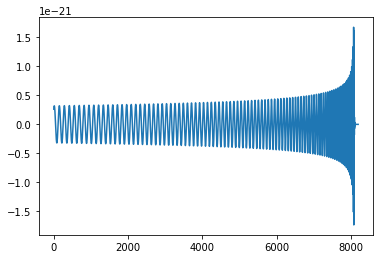

In [42]:
plt.plot(tt_[-8192:,1])

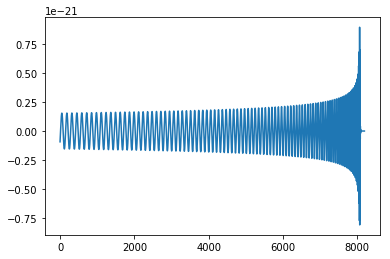

In [43]:
plt.plot(tt[-8192:,1])

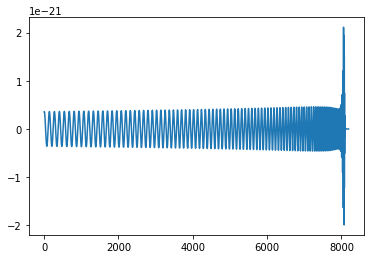

In [45]:
plt.plot(tt_[-8192:,1] - tt[-8192:,1])

``` Python
from random import sample as love_from_boss

while luck not in my_life:
    
    if holiday and love_from_boss([0]*364+[1],1)[0]:
        print('Happiness!')
        My_life_my_choice(max_power=True, sleep_24h = True)
        
    wakeup()
    breakfasts()
    woking()
    
    lunch()
    try:
        sleep(1)
        lifespan += 1
        bonus -= 100
    except:
        lifespan -= 1
    woking()

    try:
        bodyshaping()
        bodyweight -= 100
    except:
        bodyweight += 100
    supper()
    
    while not luck:
        try:
            submit(mywork)
        except Exception as e:
            print('Boss: What is this shit?!',e)
            print('Boss: So! Go fxxk yourself, {:s}！'.format(myname))
            overworking()            
        else:
            sleeping(until = 7)
            break
        finally:
            lifespan -= 10
        if lifespan <=0: 
            dead()
            print('Game over')
            break
```

In [27]:
!./Panyi_code/Panyi --help

Generate a simulation using the lalsimulation library

The following options can be given (will assume a default value if omitted):
--amp-phase                If given, will output:
                           |h+ - i hx|, Arg(h+ - i hx) (TD) or
                           |h+(f)|, Arg(h+(f)), |hx(f)|, Arg(hx(f)) (FD)
                           If not given, will output h+ and hx (TD and FD)
                           NOTE: Other approximants may be available if the
                           developer forgot to edit this help message
--amp-order ORD            Twice PN order of amplitude (default 0 <==> Newt.)
--phiRef phiRef            Phase at the reference frequency (default 0)
                           (default: 0)
--sample-rate SRATE        Sampling rate of TD approximants in Hz (default 4096)
--m1 M1                    Mass of the 1st object in solar masses (default 10)
--m2 M2                    Mass of the 2nd object in solar masses (default 1.4)
--inclination IOTA         Angl

In [26]:
!./detector_strain/MYdetector_strain --help

usage: ./detector_strain/MYdetector_strain [options] [file]
options:
        -h, --help      print this message and exit
        -v, --verbose   verbose output
        -r, --radians   use radians rather than decimal degrees
        -O, --overhead  signal from directly overhead
        -D PREFIX, --detector-prefix=PREFIX     (required unless overhead)
                detector prefix (e.g., 'H1', 'L1', 'V1')
        -t EPOCH, --gps-time=EPOCH              (required)
                time of arrival at earth geocenter (or at detector if overhead):
                this is added to the timestamp of the input data,
                which should be an waveform about time = 0
        -a RA, --right-ascension=RA             (required unless overhead)
                right ascension in H:M:S format or decimal degrees
        -d DEC, --declination=DEC               (required unless overhead)
                declination in D:M:S format or decimal degrees
        -p PSI, --polarization-angle=PSI     

In [4]:
def Panyi_detector(i):
    os.system('./Panyi_code/Panyi --m1 10 --m2 10 --sample-rate 8192 --f-min 20 --outname waveform%s \
                                  --spin1x 0.5 --spin1y 0.5 --spin1z 0 \
                                  --spin2x 0 --spin2y 0 --spin2z 0 \
                                  --inclination 0 --distance 100' %i)
    os.system('./detector_strain/MYdetector_strain -D H1 -a 1:23:45 -d 45.0 -p 30.0 -t 1000000000 < waveform%s >           H1_waveform%s' %(i,i))
    os.system('./detector_strain/MYdetector_strain -D L1 -a 1:23:45 -d 45.0 -p 30.0 -t 1000000000 < waveform%s > L1_waveform%s' %(i,i))
    # os.system('./detector_strain/MYdetector_strain -D V1 -a 1:23:45 -d 45.0 -p 30.0 -t 1000000000 < waveform > V1_waveform')

    H1 = pd.DataFrame(np.loadtxt('./H1_waveform%s' %i))
    L1 = pd.DataFrame(np.loadtxt('./L1_waveform%s' %i))
    print(H1.shape, L1.shape)
    # Plot
    # plt.figure(figsize=(10,3))
    # plt.subplot(1,3,1)
    # plt.plot(H1[0][-8192:],H1[1][-8192:])
    # plt.subplot(1,3,2)
    # plt.plot(L1[0][-8192:],L1[1][-8192:])
    # plt.subplot(1,3,3)
    # plt.plot(L1[0][-8192:],L1[1][-8192:])
    # plt.plot(H1[0][-8192:],H1[1][-8192:])
    # plt.show()
    # Check
    print(np.allclose(H1[0], L1[0])) # 一致的 GPS 时间
    print(H1[1].argmax())
    print(L1[1].argmax())   # 不一致的 peak 抵达的 GPS 时间
    os.system('rm waveform%s H1_waveform%s L1_waveform%s' %(i,i,i))

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import ray
import time

# from data_utils import *
# from plot import *

### importing the library
# from __future__ import print_function
import pandas as pd
import numpy as np
# import seaborn as sns

# from scipy import signal

# import matplotlib.pyplot as plt
# %matplotlib inline 

import os, sys, time

# # for auto-re00loading external modules
# # see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
# %load_ext autoreload
# %autoreload 2

In [2]:
ray.init(num_cpus=3, include_webui=False, ignore_reinit_error=True)
# ray.init(num_cpus=2, include_webui=False, ignore_reinit_error=True, redis_address='127.0.0.1:6379',use_raylet=True)

Process STDOUT and STDERR is being redirected to /tmp/raylogs/.
Waiting for redis server at 127.0.0.1:10222 to respond...
Waiting for redis server at 127.0.0.1:59847 to respond...
Starting the Plasma object store with 6.00 GB memory.
Starting local scheduler with the following resources: {'CPU': 3, 'GPU': 0}.


{'local_scheduler_socket_names': ['/tmp/scheduler94641129'],
 'node_ip_address': '172.20.10.2',
 'object_store_addresses': [ObjectStoreAddress(name='/tmp/plasma_store10258756', manager_name='/tmp/plasma_manager37891360', manager_port=29742)],
 'raylet_socket_names': [],
 'redis_address': '172.20.10.2:10222',
 'webui_url': ''}

In [3]:
def slow_function(i):
    time.sleep(1)
    return i

time.sleep(2.0)
start_time = time.time()

results = [slow_function(i) for i in range(3)]

end_time = time.time()
duration = end_time - start_time

print('The results are {}. This took {} seconds.'.format(results, duration))

The results are [0, 1, 2]. This took 3.0074760913848877 seconds.


In [5]:
@ray.remote
def slow_function(i):
    time.sleep(1)
    return i

time.sleep(2.0)
start_time = time.time()

results = ray.get([slow_function.remote(i) for i in range(3)])

end_time = time.time()
duration = end_time - start_time

print('The results are {}. This took {} seconds.'.format(results, duration))

The results are [0, 1, 2]. This took 1.2582652568817139 seconds.


In [5]:
time.sleep(2.0)
start_time = time.time()

for i in range(4):
    Panyi_detector(i)

end_time = time.time()
duration = end_time - start_time

print('This took {} seconds.'.format(duration))

(49199, 2) (49199, 2)
True
48952
48960
(49199, 2) (49199, 2)
True
48952
48960
(49199, 2) (49199, 2)
True
48952
48960
(49199, 2) (49199, 2)
True
48952
48960
This took 32.59179091453552 seconds.


In [6]:
ray.init(num_cpus=4, include_webui=False, ignore_reinit_error=True)

Process STDOUT and STDERR is being redirected to /tmp/raylogs/.
Waiting for redis server at 127.0.0.1:46396 to respond...
Waiting for redis server at 127.0.0.1:59425 to respond...
Starting the Plasma object store with 6.00 GB memory.
Starting local scheduler with the following resources: {'CPU': 4, 'GPU': 0}.


{'local_scheduler_socket_names': ['/tmp/scheduler16071060'],
 'node_ip_address': '172.20.10.2',
 'object_store_addresses': [ObjectStoreAddress(name='/tmp/plasma_store69860707', manager_name='/tmp/plasma_manager76673208', manager_port=38509)],
 'raylet_socket_names': [],
 'redis_address': '172.20.10.2:46396',
 'webui_url': ''}

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import ray
import time

import pandas as pd
import numpy as np

import os, sys

ray.init(num_cpus=10, include_webui=False, ignore_reinit_error=True)

Process STDOUT and STDERR is being redirected to /tmp/raylogs/.
Waiting for redis server at 127.0.0.1:19484 to respond...
Waiting for redis server at 127.0.0.1:46010 to respond...
Starting the Plasma object store with 6.00 GB memory.
Starting local scheduler with the following resources: {'CPU': 4, 'GPU': 0}.


{'local_scheduler_socket_names': ['/tmp/scheduler38629234'],
 'node_ip_address': '172.20.10.2',
 'object_store_addresses': [ObjectStoreAddress(name='/tmp/plasma_store32410129', manager_name='/tmp/plasma_manager90462910', manager_port=32213)],
 'raylet_socket_names': [],
 'redis_address': '172.20.10.2:19484',
 'webui_url': ''}

In [2]:
@ray.remote
def Panyi_detector(i):
    os.system('./Panyi_code/Panyi --m1 10 --m2 10 --sample-rate 8192 --f-min 20 --outname waveform%s \
                                  --spin1x 0.5 --spin1y 0.5 --spin1z 0 \
                                  --spin2x 0 --spin2y 0 --spin2z 0 \
                                  --inclination 0 --distance 100' %i)
    os.system('./detector_strain/MYdetector_strain -D H1 -a 1:23:45 -d 45.0 -p 30.0 -t 1000000000 < waveform%s >           H1_waveform%s' %(i,i))
    os.system('./detector_strain/MYdetector_strain -D L1 -a 1:23:45 -d 45.0 -p 30.0 -t 1000000000 < waveform%s > L1_waveform%s' %(i,i))
    H1 = pd.DataFrame(np.loadtxt('./H1_waveform%s' %i))
    L1 = pd.DataFrame(np.loadtxt('./L1_waveform%s' %i))
    print(H1.shape, L1.shape)
    
    print(np.allclose(H1[0], L1[0])) 
    print(H1[1].argmax())
    print(L1[1].argmax())  
    os.system('rm waveform%s H1_waveform%s L1_waveform%s' %(i,i,i))    

    return i

In [3]:
time.sleep(2.0)
start_time = time.time()

ray.get([Panyi_detector.remote(i) for i in range(4)])

end_time = time.time()
duration = end_time - start_time

print('This took {} seconds.'.format(duration))

This took 17.127148151397705 seconds.


In [4]:
def Panyi_detector(i):
    os.system('./Panyi_code/Panyi --m1 10 --m2 10 --sample-rate 8192 --f-min 20 --outname waveform%s \
                                  --spin1x 0.5 --spin1y 0.5 --spin1z 0 \
                                  --spin2x 0 --spin2y 0 --spin2z 0 \
                                  --inclination 0 --distance 100' %i)
    os.system('./detector_strain/MYdetector_strain -D H1 -a 1:23:45 -d 45.0 -p 30.0 -t 1000000000 < waveform%s >           H1_waveform%s' %(i,i))
    os.system('./detector_strain/MYdetector_strain -D L1 -a 1:23:45 -d 45.0 -p 30.0 -t 1000000000 < waveform%s > L1_waveform%s' %(i,i))
    H1 = pd.DataFrame(np.loadtxt('./H1_waveform%s' %i))
    L1 = pd.DataFrame(np.loadtxt('./L1_waveform%s' %i))
    print(H1.shape, L1.shape)
    
    print(np.allclose(H1[0], L1[0])) 
    print(H1[1].argmax())
    print(L1[1].argmax())  
    os.system('rm waveform%s H1_waveform%s L1_waveform%s' %(i,i,i))    

    return i

In [5]:
# time.sleep(2.0)
start_time = time.time()

[Panyi_detector(i) for i in range(4)]

end_time = time.time()
duration = end_time - start_time

print('This took {} seconds.'.format(duration))

(49199, 2) (49199, 2)
True
48952
48960
(49199, 2) (49199, 2)
True
48952
48960
(49199, 2) (49199, 2)
True
48952
48960
(49199, 2) (49199, 2)
True
48952
48960
This took 25.887086153030396 seconds.


In [6]:
Panyi_detector(0)

(49199, 2) (49199, 2)
True
48952
48960


0